In [4]:
import torch
import torchaudio
import lit_modules

torch.set_grad_enabled(False)
device = "cpu"

In [5]:
# Load 2 audio files

y1, sr = torchaudio.load("tb_logs/disentangle-vae/lightning_logs/version_1/audio_x1.wav")
y1 = y1[None,:1,:sr*8]
y2, sr = torchaudio.load("tb_logs/disentangle-vae/lightning_logs/version_1/audio_x2.wav")
y2 = y2[None,:1,:sr*8]

In [6]:
# Load the trained model
model = lit_modules.LitMelspecDisentangleVAEGAN.load_from_checkpoint(
        "tb_logs/disentangle-vae/lightning_logs/version_0/checkpoints/epoch=7-step=26240.ckpt").to(device)
model.eval()

Lightning automatically upgraded your loaded checkpoint from v1.9.4 to v2.0.6. To apply the upgrade to your files permanently, run `python -m lightning.pytorch.utilities.upgrade_checkpoint --file tb_logs/disentangle-vae/lightning_logs/version_0/checkpoints/epoch=7-step=26240.ckpt`


LitMelspecDisentangleVAEGAN(
  (model): PitchDisentangleVAEGAN(
    (discriminator): Conv2dDiscriminator(
      (net): ModuleList(
        (0): Conv2d(1, 16, kernel_size=(1, 1), stride=(1, 1))
        (1): LeakyReLU(negative_slope=0.2)
        (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2))
        (3): LeakyReLU(negative_slope=0.2)
        (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
        (5): LeakyReLU(negative_slope=0.2)
        (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
        (7): LeakyReLU(negative_slope=0.2)
        (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2))
        (9): LeakyReLU(negative_slope=0.2)
        (10): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2))
        (11): LeakyReLU(negative_slope=0.2)
        (12): Conv2d(512, 1, kernel_size=(1, 1), stride=(1, 1))
      )
    )
    (encoder): Shared2DDisentEncoder(
      (shared_encoder): ResConv2DEncoder(
        (conv_in): Sequential(
          (0): Conv2d(1, 32, kernel_si

In [7]:
# Infer the mixed spectrogram using model.forward_mix()
# The last 2 arguments are the "harmony" and "rhythm" weights of y1.
# For example, the following code will generate a spectrogram that is 100% y1's harmony and 100% y2's rhythm.

mel_mix = model.forward_mix(y1, y2, 0.0, 1.0)

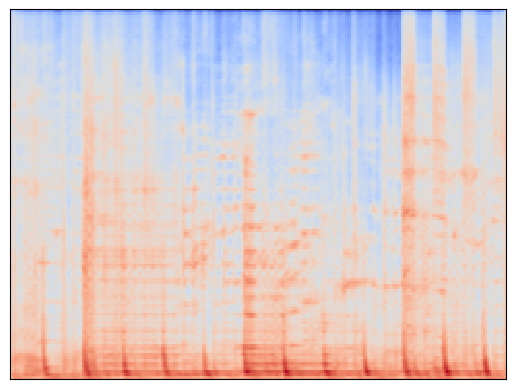

In [8]:
from librosa.display import specshow

specshow(mel_mix[0,0,:,:].cpu().numpy())